# 1. Astropy Coordinates

The [Messier Objects](https://en.wikipedia.org/wiki/Messier_object) are a set of 110 astronomical objects catalogued by the French astronomer Charles Messier first back in 1774. The catalogue consists of a diverse range of astronomical objects, from star clusters and nebulae to galaxies. Messier objects are extremely popular targets for amateur astronomers. Back on campus, we organised a lot of Messier Marathons in which you would have to identify and locate as many Messiers in a fixed time. The following question is inspired by **SnT Code** - probably the most popular and fun event during your stay on campus. Below is a picture of [M42 (Orion Nebula)](https://en.wikipedia.org/wiki/Orion_Nebula) for absolutely no reason. 

<p align="centre">
<img src="../assets/img4.jpg" width="300">
</p>
    


## Identify the Messier

You are given the location (RA, DEC) of stars in 2 different globular clusters and based on the data given you have to identify the Messier in the question using your detective skills and the techniques that you have learnt in the previous modules.

<p align="centre">
<img src="../assets/img5.png" width="350">
</p>


### Guidelines:

> 1. The mean of Right Ascension and Declination can be approximated as the actual location of the Globular Cluster.
> 2. Use `SkyCoord.from_name` to prepare a catalog of Messiers with their coordinates (and save it in a CSV file).
> 3. Employ the crossmatching techniques that you learnt to find out the nearest Messier to your target cluster. You may take the offset radius to be 30 arcsec. 

**Note:** Hints will be released at 12:00 A.M 13th June (Sunday). 

In [2]:
import numpy as np 
import pandas as pd 
from astropy.coordinates import SkyCoord
df=pd.read_csv('Clusters.csv')
df.groupby('Cluster')['RA', 'DEC'].mean()
#LOCATION OF TARGET CLUSTERS:




<ipython-input-2-9b3b019b4228>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Cluster')['RA', 'DEC'].mean()


,RA,DEC
Cluster,,
1.0,279.100248,-23.901916
2.0,158.833234,65.754445


In [36]:
import numpy as np 
import pandas as pd 
import csv
from astropy.coordinates import SkyCoord
Messiers = []
ra=[]
dec=[]
for i in range(1, 111):
    Messier = str("M"+str(i))
    Messiers.append(Messier)
for i in range(len(Messiers)):
    Coordinate = SkyCoord.from_name(Messiers[i])
    ra.append(Coordinate.ra.degree)
    dec.append(Coordinate.dec.degree)
with open('Messiers.csv', 'w', newline='') as file:
    fieldnames = ['MESSIER_NAME', 'RA','DEC']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(Messiers)):
        writer.writerow({'MESSIER_NAME':Messiers[i],'RA':ra[i],'DEC':dec[i]})



In [35]:
import pandas as pd 
df=pd.read_csv('Messiers.csv')
df

,M1,83.63308333,22.0145
0,M2,323.362583,-0.823250
1,M3,205.548417,28.377278
2,M4,245.896750,-26.525750
3,M5,229.638417,2.081028
4,M6,265.083333,-32.253333
...,...,...,...
104,M106,184.740083,47.303719
105,M107,248.132750,-13.053778
106,M108,167.879029,55.674122
107,M109,179.399933,53.374519


In [41]:
import numpy as np 
import pandas as pd 
from astropy.coordinates import SkyCoord
df=pd.read_csv('Clusters.csv')
df1=df.groupby('Cluster')['RA','DEC'].mean()
print(df1.head())
df2=pd.read_csv('Messiers.csv')
df2.head()



                 RA        DEC
Cluster                       
1.0      279.100248 -23.901916
2.0      158.833234  65.754445
<ipython-input-41-0b9886998307>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby('Cluster')['RA', 'DEC'].mean()


,MESSIER_NAME,RA,DEC
0,M1,83.633083,22.014500
1,M2,323.362583,-0.823250
2,M3,205.548417,28.377278
3,M4,245.896750,-26.525750
4,M5,229.638417,2.081028


In [51]:
import numpy as np
from astropy import units as u 
ra1=np.asarray(df1['RA'])
dec1=np.asarray(df1['DEC'])
ra2=np.asarray(df2['RA'])
dec2=np.asarray(df2['DEC'])
c1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree, frame='icrs')
c2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree, frame='icrs')
idx,d2d,d3d = (c1).match_to_catalog_sky(c2)


In [55]:
matches = []
max_radius = 30./3600 #N

df1['Astrosat_Flag'] = np.zeros(len(df1))
df1['RA'] = np.zeros(len(df1))
for id1, (closest_id2, dist) in enumerate(zip(idx, d2d)): #iterate over every element in idx
    closest_dist = dist.value
    if closest_dist < max_radius: #if closest_distance is less than max threshold for errors they must be the same object
        matches.append([id1, closest_id2, closest_dist])
        df1['Astrosat_Flag'][id1] = 1 #Set Flag = 1 if there is a match
        df1['RA'][id1] = df2['RA'][closest_id2]
print(df1[df1['Astrosat_Flag']==1].head())
print('coordinates of Globular Cluster 1 match with M22')
print("coordinates of Gobular Cluster 2 does not lie in 30.0 arsec range")

                RA        DEC  Astrosat_Flag
Cluster                                     
1.0      279.09975 -23.901916            1.0
coordinates of Globular Cluster 1 match with M22
coordinates of Gobular Cluster 2 does not lie in 30.0 arsec range


# 2. Scipy

The file GW_data_file.csv contains the timeseries and the frequency data of the first Gravitational Wave detection made by LIGO, GW150914.
The data file has 3 arrays:
a) the strain data, which is filtered, so you don't have to worry about noises,
b) the frequency of the data at that particular time (Not exactly),
c) the time.

**Hint**: You can import it using this code:

```python
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')
```

This will automatically give you the data, frequency and the time arrays.

Your first task is to make two plots:
(a) strain vs time
(b) frequency vs time.

You should notice something weird about the frequency plot. Why is it weird?

Find out the indexes of [zero-crossings](https://en.wikipedia.org/wiki/Zero_crossing). Use the frequency and the time at these zero-crossings to make a frequency vs time scatter plot.

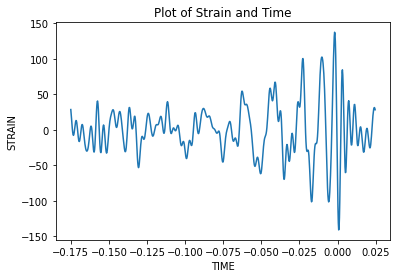

In [5]:
import pandas as pd 
import astropy
import numpy as np
data,freq,time = np.loadtxt('GW_data_file.csv',delimiter=',',unpack=False)
import matplotlib.pyplot as plt 
plt.plot(time,data)
plt.title("Plot of Strain and Time")
plt.xlabel('TIME')
plt.ylabel('STRAIN')
plt.show()



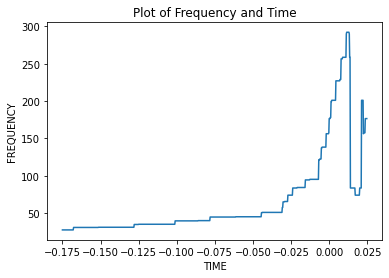

In [6]:
plt.plot(time,freq)
plt.title("Plot of Frequency and Time")
plt.xlabel('TIME')
plt.ylabel('FREQUENCY')
plt.show()

If you got your results correct, you should see a monotonically increasing function. According to General Relativity, the frequency-time relationship is a power law. Mathematically it is given by:

$$ f_{GW}^{-8/3}(t) = \frac{(8\pi)^{8/3}}{5}\Big(\frac{G\mathcal{M}}{c^{3}}\Big)^{5/3}(t_{c}-t) $$
Where $f_{GW}$ is the frequency of Gravitational Waves, $\mathcal{M}$ is the [chirp mass](https://en.wikipedia.org/wiki/Chirp_mass) of the Binary system and $t_{c}$ is the time of coalescence, the time with the $t=0$ mark in your data. Note that this equation is applicable only for $t < t_{c}$, as after this is the ringdown where the process is highly non-linear and it is not possible to predict the equation followed by the frequency.

Your task is to take points with frequency higher than 50 Hz until $t_{c}$ and fit a curve to get the chirp mass of the system

> _*You can find more about the event in this [paper](https://arxiv.org/pdf/1608.01940.pdf).*_

# 3. Time-series Analysis

> Go to the OGLE database mentioned in the tutorial notebook. Follow the query procedure and choose any Cepheid of your choice. Download it's relevant data available that is, data for which the plot has been shown on the webpage. 
Analyse the data to determine the time period and thus phase fold the given data.

<p align="centre">
<img src="../assets/img6.png" width="300">
</p>
    

In [3]:
import numpy as np
time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0012.dat", unpack=True)

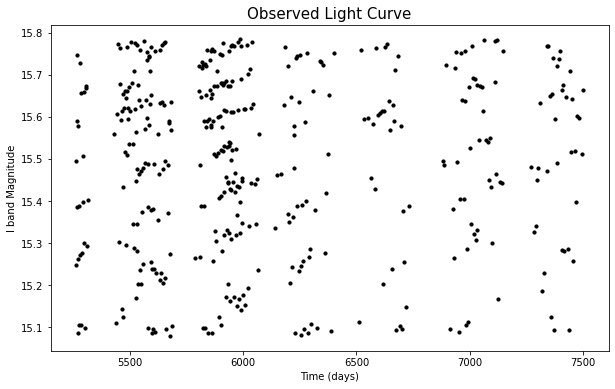

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(time, I_mag,c='k', s=10)
plt.xlabel("Time (days)")
plt.ylabel("I band Magnitude")
plt.title("Observed Light Curve",size=15)
plt.show()

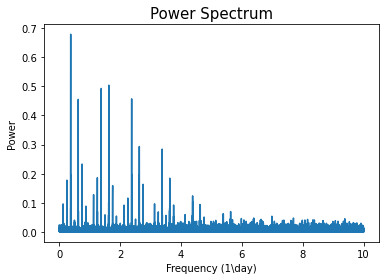

In [5]:
time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0012.dat", unpack=True)
from astropy.timeseries import LombScargle
frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)
plt.plot(frequency, power)
plt.xlabel('Frequency (1\day)')
plt.ylabel('Power')
plt.title("Power Spectrum", size=15)
plt.show()

In [6]:

period=1/frequency[np.argmax(power)]
print(period)

2.6603080429739956


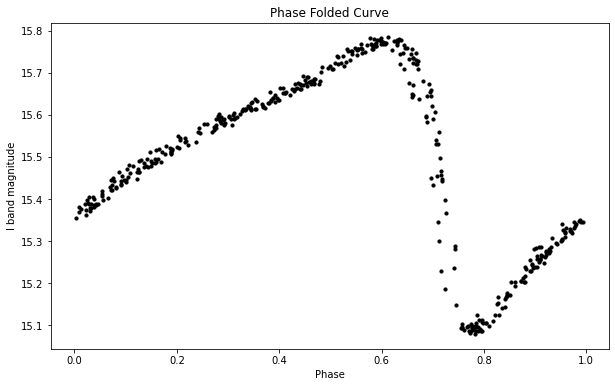

In [7]:
phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='k',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve")
plt.show()
